### 필수과제1
- 시계열 데이터에 대한 전처리나 분석방법을 배웠으니
- IS_CRIME, IS_TRAFFIC 두 개의 컬럼을 가지고 시계열 데이터로 연도별, 매월, 분석을 진행하는 분석가의 목적에 따라 진행하면 됩니다. (기간은)
- 지역별로의 어떤 범죄 유형이나, traffic 유형이 있는지를 간단하게 시각화해서 정리하면 좋을 것 같습니다.
- 산출물은 
    - crime
    - traffic
    - 이 두 가지 부분에 대해서 고민하고 시각화 코드로 정리 후, 인사이트는 주석 또는 마크다운으로 정리해 주세요.

In [1]:
import pandas as pd
df = pd.read_csv('crime.csv')

In [2]:
df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...,...
460906,460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [3]:
df['REPORTED_DATE'] = pd.to_datetime(df['REPORTED_DATE']) # 문자열로 되어 있는 REPORTED_DATE를 날짜형식으로 변환해주자.

In [4]:
df.info() # 잘 변환되었다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           460911 non-null  int64         
 1   OFFENSE_TYPE_ID      460911 non-null  object        
 2   OFFENSE_CATEGORY_ID  460911 non-null  object        
 3   REPORTED_DATE        460911 non-null  datetime64[ns]
 4   GEO_LON              457296 non-null  float64       
 5   GEO_LAT              457296 non-null  float64       
 6   NEIGHBORHOOD_ID      460911 non-null  object        
 7   IS_CRIME             460911 non-null  int64         
 8   IS_TRAFFIC           460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 31.6+ MB


In [5]:
# set_index() 메서드를 사용하여 REPORTED_DATE를 인덱스로 지정해주자.
df = df.set_index('REPORTED_DATE')

In [6]:
df # 잘 변환되었다.

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


In [10]:
import matplotlib.pyplot as plt

### 연도별 및 월별 범죄 데이터 분석

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


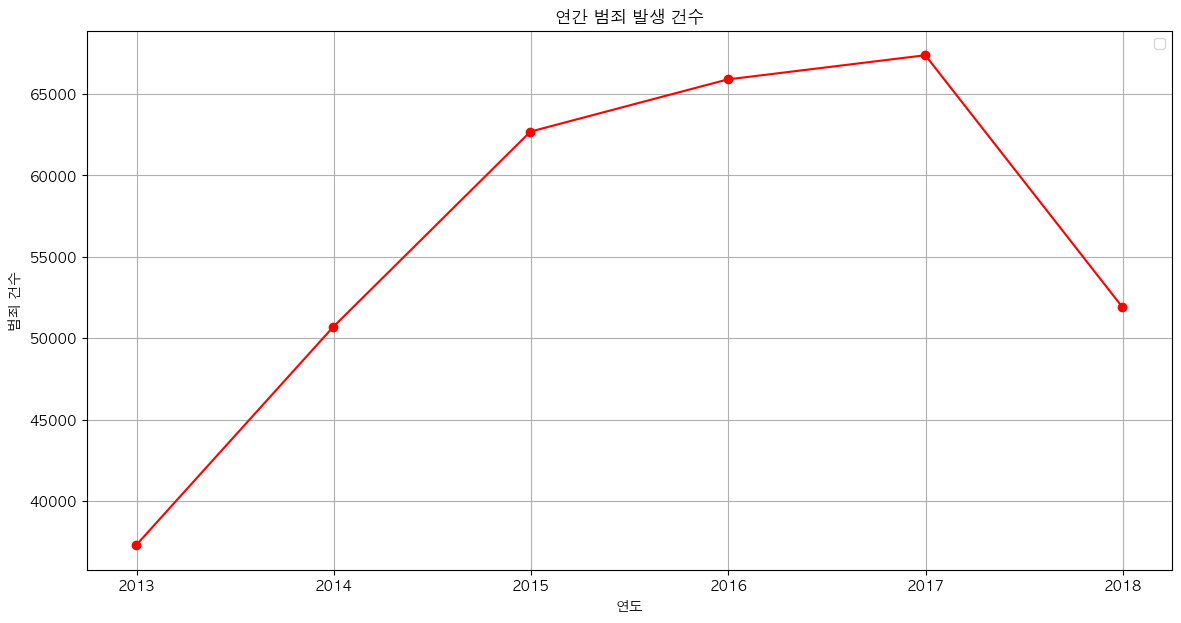

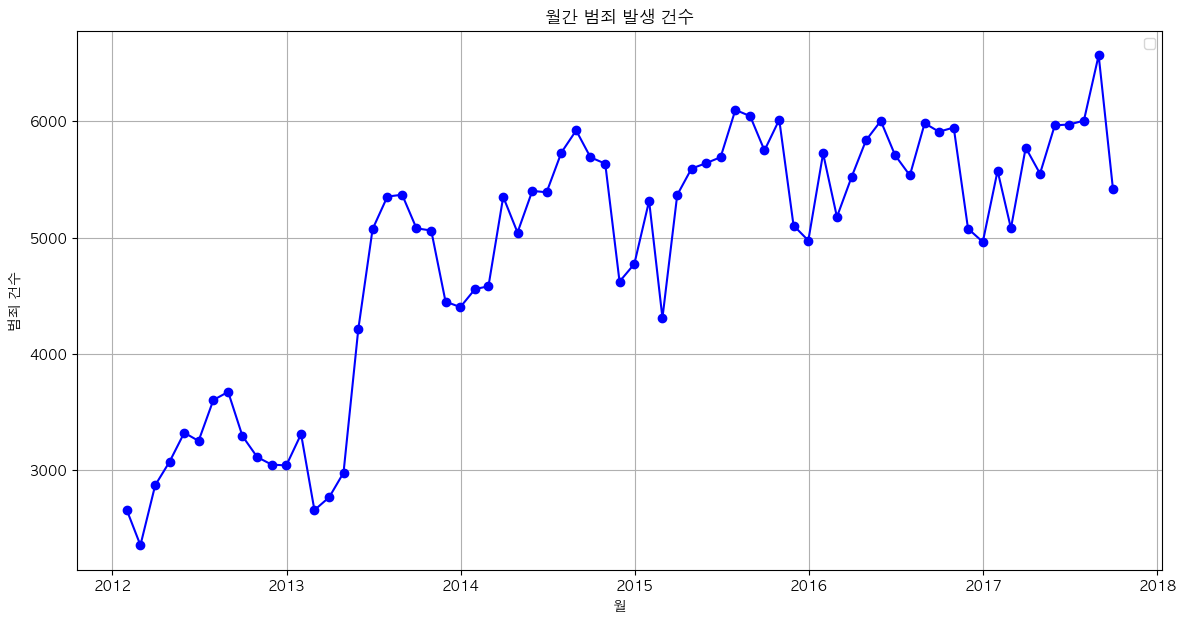

In [11]:
plt.rcParams['font.family'] = 'AppleGothic'

# 연도별 범죄 데이터
yearly_crime = df['IS_CRIME'].resample('Y').sum()
monthly_crime = df['IS_CRIME'].resample('M').sum()

# 연도별 범죄 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(yearly_crime, marker='o', linestyle='-', color='r')
plt.title('연간 범죄 발생 건수')
plt.xlabel('연도')
plt.ylabel('범죄 건수')
plt.grid(True)
plt.legend(loc = 'best')

# 월별 범죄 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(monthly_crime, marker='o', linestyle='-', color='b')
plt.title('월간 범죄 발생 건수')
plt.xlabel('월')
plt.ylabel('범죄 건수')
plt.grid(True)
plt.legend(loc = 'best')

### 연도별 및 월별 교통 데이터 분석

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


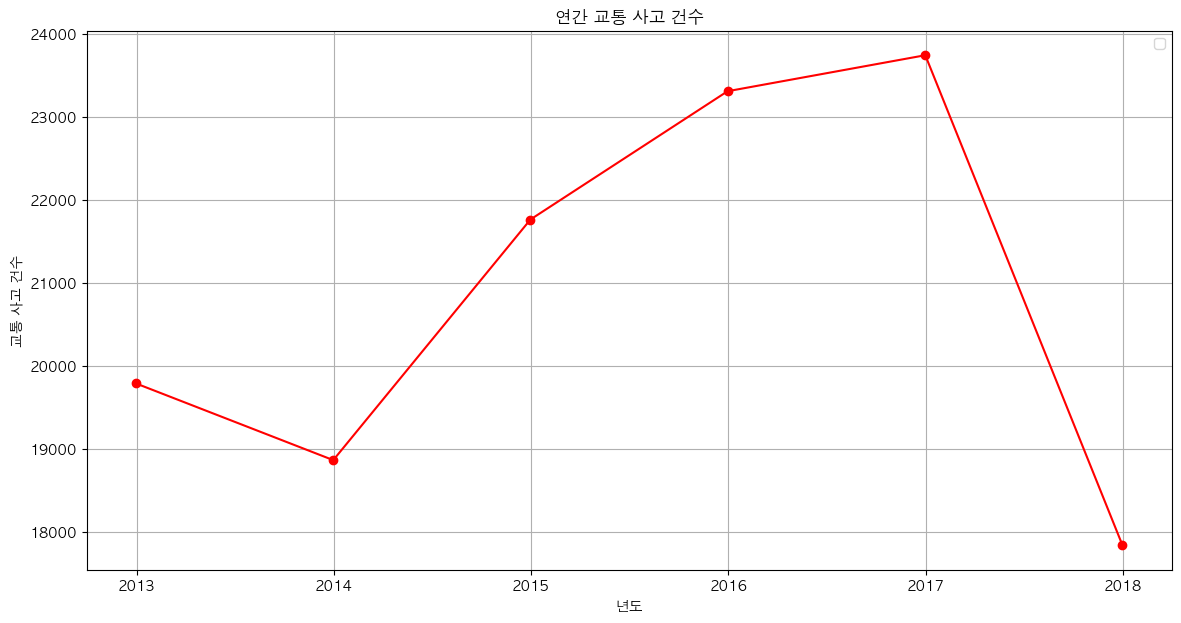

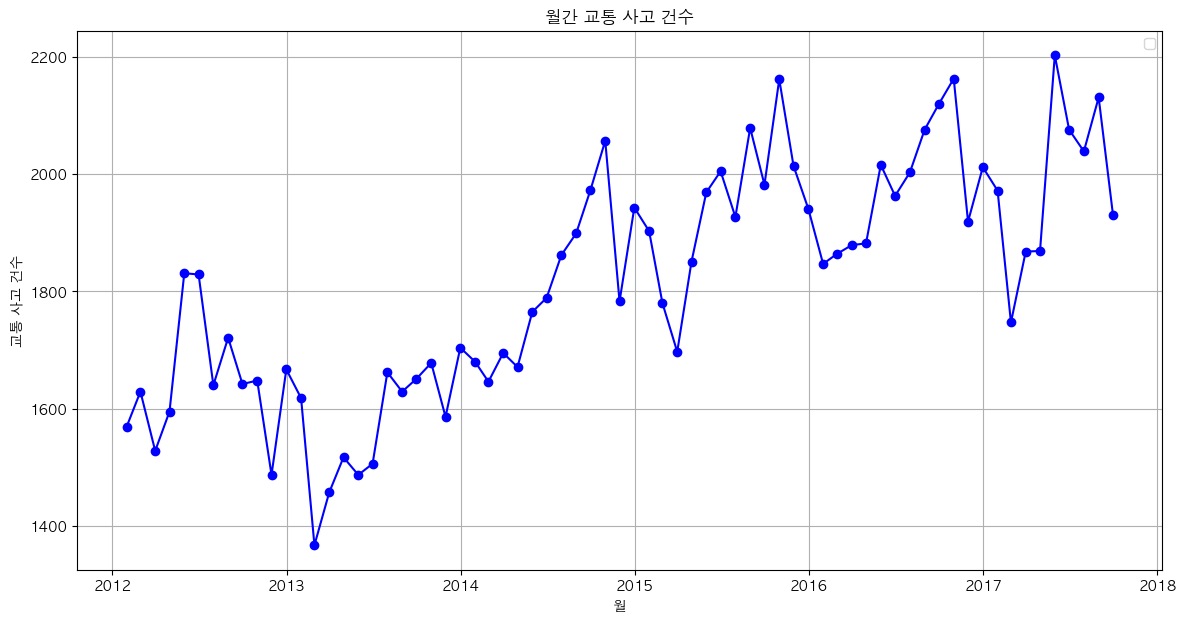

In [12]:
plt.rcParams['font.family'] = 'AppleGothic'

# 연도별 교통 데이터
yearly_traffic = df['IS_TRAFFIC'].resample('Y').sum()
monthly_traffic = df['IS_TRAFFIC'].resample('M').sum()

# 연도별 교통 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(yearly_traffic, marker='o', linestyle='-', color='r')
plt.title('연간 교통 사고 건수')
plt.xlabel('년도')
plt.ylabel('교통 사고 건수')
plt.grid(True)
plt.legend(loc = 'best')

# 월별 교통 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(monthly_traffic, marker='o', linestyle='-', color='b')
plt.title('월간 교통 사고 건수')
plt.xlabel('월')
plt.ylabel('교통 사고 건수')
plt.grid(True)
plt.legend(loc = 'best')

In [13]:
import seaborn as sns

### 지역별 범죄 및 교통 데이터 분석

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


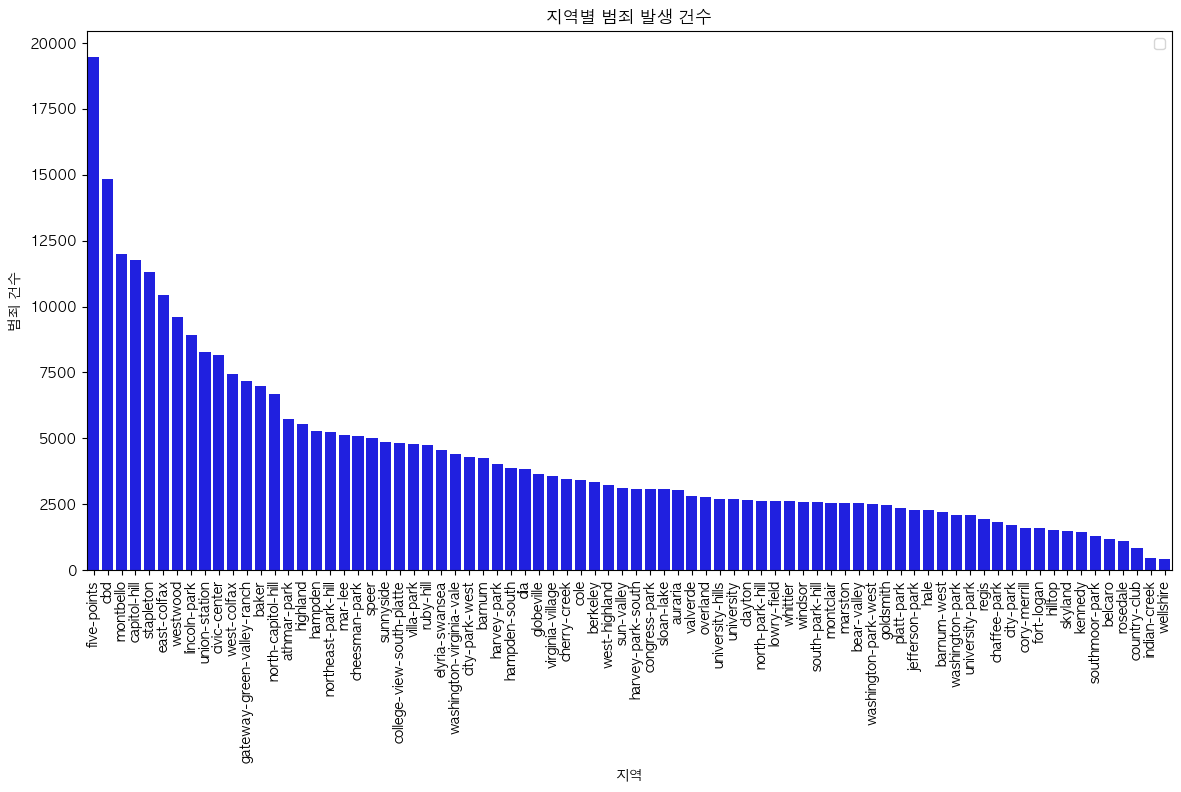

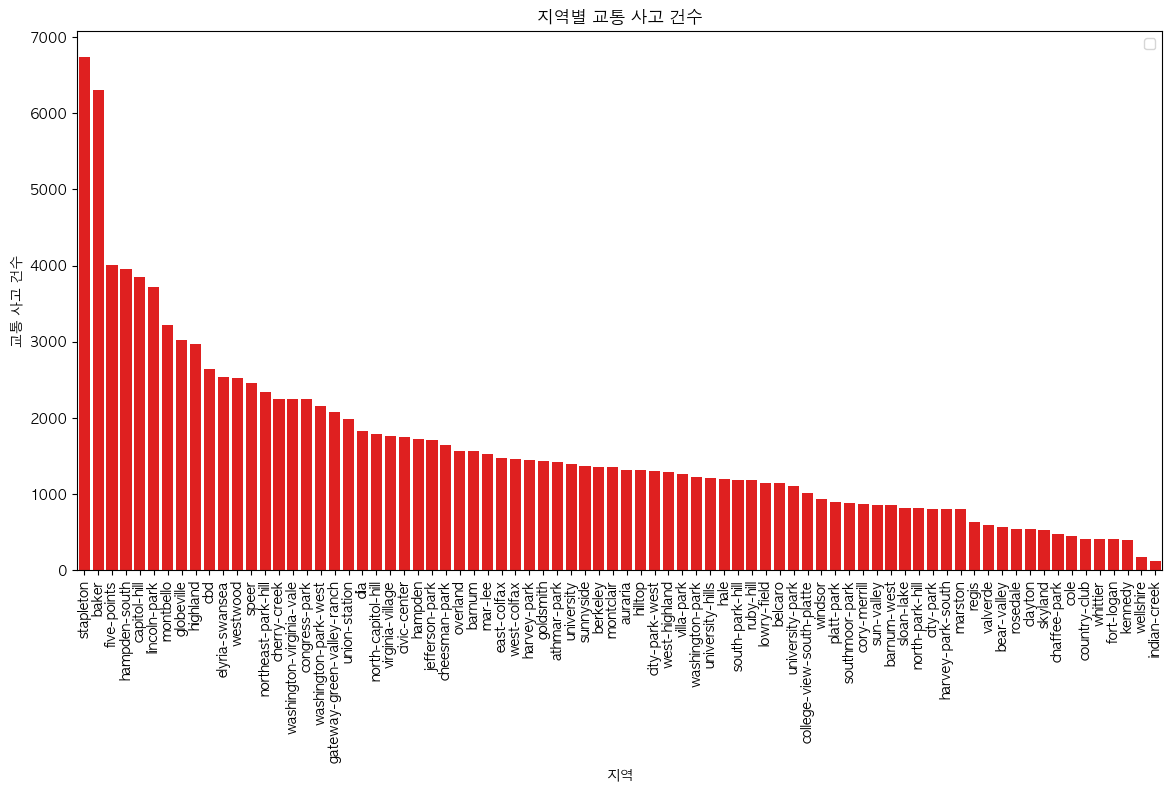

In [16]:
plt.rcParams['font.family'] = 'AppleGothic'

# 지역별 범죄 데이터
neighborhood_crime = df[df['IS_CRIME'] == 1]['NEIGHBORHOOD_ID'].value_counts()

# 지역별 교통 데이터
neighborhood_traffic = df[df['IS_TRAFFIC'] == 1]['NEIGHBORHOOD_ID'].value_counts()

# 지역별 범죄 데이터 시각화
plt.figure(figsize=(14, 7))
sns.barplot(x=neighborhood_crime.index, y=neighborhood_crime.values, color='blue')
plt.title('지역별 범죄 발생 건수')
plt.xlabel('지역')
plt.ylabel('범죄 건수')
plt.xticks(rotation=90)
plt.legend(loc = 'best')

# 지역별 교통 데이터 시각화
plt.figure(figsize=(14, 7))
sns.barplot(x=neighborhood_traffic.index, y=neighborhood_traffic.values, color='red')
plt.title('지역별 교통 사고 건수')
plt.xlabel('지역')
plt.ylabel('교통 사고 건수')
plt.xticks(rotation=90)
plt.legend(loc = 'best')


### 인사이트
#### 범죄 데이터
- 연도별 범죄 데이터 분석을 통해 2017년까지 범죄 발생이 증가하지만 이후 감소하는 추세를 확인할 수 있다.
- 월별 범죄 데이터 분석을 통해 하락하는 모습도 보여줬으나 장기적으로 보았을 때 계속 증가하는 것을 확인할 수 있다.
- 지역별 범죄 데이터 분석을 통해 five-point 지역에서 가장 많은 범죄가 발생했음을 알 수 있다.
#### 교통 데이터
- 연도별 교통 데이터 분석을 통해 2017년까지 교통 사고 발생이 증가하지만 이후 감소하는 추세를 확인할 수 있다.
- 월별 교통 사고 데이터 분석을 통해 하락하는 모습도 보여줬으나 장기적으로 보았을 때 계속 증가하는 것을 확인할 수 있다.
- 지역별 교통 사고 데이터 분석을 통해 stapleton 지역에서 가장 많은 교통 사고가 발생했음을 알 수 있다.